In [19]:
# imports
import pandas as pd
import numpy as np
import joblib # necessary to save model to be used by classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# load cleaned dataset
df = pd.read_csv("../data/processed/cleaned_rentals.csv")
print("Dataset loaded with shape:", df.shape)
df.head()


Dataset loaded with shape: (196, 49)


,rentfaster_id,city,province,address,latitude,longitude,price,beds,baths,sq_feet,...,availability_date_Negotiable,availability_date_No Vacancy,availability_date_November 24,availability_date_October 01,availability_date_October 04,availability_date_September 01,smoking_Non-Smoking,smoking_Smoke Free Building,cats_True,dogs_True
0,544095,Vancouver,British Columbia,1770 Pendrell Street,49.287460,-123.140530,3895.0,2,2.0,820.0,...,False,False,False,False,False,False,True,False,True,True
1,544095,Vancouver,British Columbia,1770 Pendrell Street,49.287460,-123.140530,2695.0,1,1.0,440.0,...,False,False,False,False,False,False,True,False,True,True
2,544095,Vancouver,British Columbia,1770 Pendrell Street,49.287460,-123.140530,4395.0,2,2.0,639.0,...,False,False,False,False,False,False,True,False,True,True
3,544095,Vancouver,British Columbia,1770 Pendrell Street,49.287460,-123.140530,3300.0,1,1.0,650.0,...,False,False,False,False,False,False,True,False,True,True
4,559642,Vancouver,British Columbia,1477 Continental Street,49.274461,-123.130948,2450.0,1,1.0,639.0,...,False,False,False,False,False,False,False,False,True,True


In [20]:
# target variable
y = df['price']

# cols we want to keep aka the good features
cols_to_keep = [
     "sq_ft", "beds", "baths", "type_Townhouse", "furnishing_Negotiable","furnishing_Unfurnished",
     "type_Basement","type_Condo Unit","type_Main Floor", "latitude", "longitude", "price",
     "smoking_Non-Smoking","smoking_Smoke Free Building","cats_True","dogs_True"
     "lease_term_6 months","lease_term_Long Term","lease_term_Negotiable","lease_term_Short Term"
]

# feature variables (exclude price and non-numeric columns)
features = [col for col in cols_to_keep if col in df.columns and col != 'price']
X = df[features]

print("Features being used:", features)

Features being used: ['beds', 'baths', 'type_Townhouse', 'furnishing_Negotiable', 'furnishing_Unfurnished', 'type_Basement', 'type_Condo Unit', 'type_Main Floor', 'latitude', 'longitude', 'smoking_Non-Smoking', 'smoking_Smoke Free Building', 'cats_True', 'lease_term_Long Term', 'lease_term_Negotiable', 'lease_term_Short Term']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set:", X_train.shape, "Testing set:", X_test.shape)

Training set: (156, 16) Testing set: (40, 16)


In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
# this saves the model as a pkl file which can be used by the classification model
joblib.dump(model, "linear_regression_model.pkl")
print("Regression saved to notebooks/linear_regression_model.pkl")

['linear_regression_model.pkl']

In [24]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

MAE: 433.39
RMSE: 622.84
R²: 0.478


Model Evaluation Metrics:
  MAE : 433.39
  RMSE: 622.84
  R²  : 0.478

Top Features Influencing Price:
                        Feature  Coefficient
14        lease_term_Negotiable  1761.836663
11  smoking_Smoke Free Building  1381.156197
10          smoking_Non-Smoking  1023.417448
1                         baths   835.642622
15        lease_term_Short Term   808.228625
0                          beds   756.402751
3         furnishing_Negotiable   150.396060
12                    cats_True   136.715090
4        furnishing_Unfurnished   -10.662723
8                      latitude   -77.791599
6               type_Condo Unit  -174.583831
2                type_Townhouse  -367.601879
13         lease_term_Long Term  -375.692317
5                 type_Basement  -806.125195
7               type_Main Floor -2297.304871
9                     longitude -3557.105162


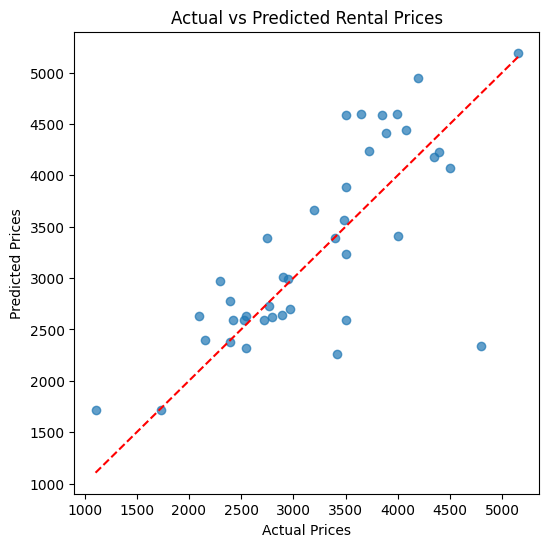

In [25]:
# model summary: coefficients and visualization

print("Model Evaluation Metrics:")
print(f"  MAE : {mae:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R²  : {r2:.3f}")
print()

coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("Top Features Influencing Price:")
print(coefficients)

# Scatter plot of actual vs predicted with a perfect prediction line
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Rental Prices")
plt.show()
